Optimización
============

Anuncios
-----------

*Para esta sección usaremos el capítulo 7.7 del libro "Modeling life" de Garfinkel y colaboradores, el cual puede ser descargado gratuitamente desde [Springer](https://link.springer.com/book/10.1007/978-3-319-59731-7).

Introducción
-----------

Hay muchas ocaciones en biología en las cuales necesitamos encontrar el valor máximo o mínimo de una cantidad. El proceso de encontrar el máximo o mínimo se llama optimización. Abajo algunos ejemplos de cantidades a optimizar:

* Un animal foragero está interesado en maximimar su consumo calórico a la vez que minimizar el costo energético asociado a la busqueda de forrage.
* Es plausible esperaar que los organismos evolucionan para maximizar su número de descendientes. Un ejemplo que estudiaremos será el caso de aves que optimizan el número de huevos que ponen. 
* En fisiología, muchos de los procesos de homoestasis son soluciones a problemas de optimización. Por ejemplo, podemos respirar muy despacio y ahorra la energía de los musculos intercostales, pero esto implica que consumimos poco oxígeno. O, podemos respirar más rápido y tomar mucho oxígeno pero entonces hacemos más ejercicio respirando y por ende gastamos más energía. La tasa de respiración observada es el valor óptimo.


Construir modelos matemáticos de reproducción o comportamiento y luego analizar como un organimos debería responder si intenta optimizar una cantidad particular puede darnos pistas sobre la biología del organismo. Incoherencias entre las predicciones de nuestro modelo y el comportamiento observado del organismo puede ser particularme interesante ya que indica que algo está mal en nuestro modelo. En todos estos casos, estámos buscando el máximo o mínimo valor de una función. Discutamos como podemos econtrar estos valores extremos.


Máximos y Mínimos en una dimensión
------------

Dada una variable $x$ y la función $y=f(x)$, el valor máximo de $f(x)$ es el valor que es mayor o igual a cualquier otro valor de $f(x)$ en el dominio de $x$. Ésto se llama **máximo global**.

Por ejemplo, consideremos $y(x)=-x^2+5$

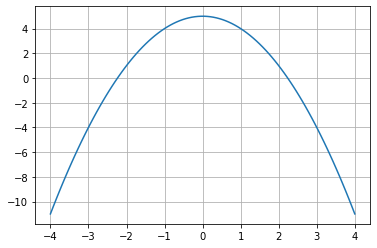

In [9]:
from matplotlib import pyplot as plt
import numpy as np
x=np.linspace(-4,4,100)
y=-np.power(x,2)+5 # -x^2 + 5
plt.plot(x,y)
plt.grid()

El valor máximo de $f(x)$ es 5, y ocurre cuando $x=0$

Otras funciones puden tener más de un máximo/mínimo global. Por ejemplo, gráfica la función $y(x)=sin(x)$ en el intervalo $x \in [-4,4]$

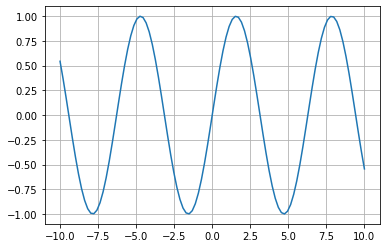

In [22]:
x=np.linspace(-10,10,100)
y=np.sin(x)
plt.plot(x,y)
plt.grid()

¿Cuántos máximos/mínimos globales tiene?

Por otra parte un **máximos/mínimos local** es un valor que es mayor que otros valores solo en su vecindad. Por ejemplo, gráfica la función $y(x)=80sin(x)-(x-5)^2$ en el intervalo $x \in [-10,20]$

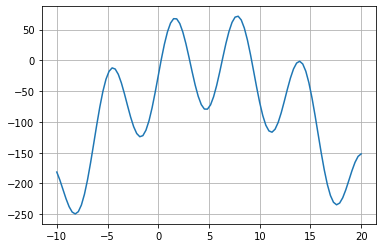

In [31]:
x=np.linspace(-10,20,100)
y=80*np.sin(x)-np.power(x-5,2)
plt.plot(x,y)
plt.grid()

**¿Cómo podemos encontrar los máximos/mínimos de una función?**

Decir que el valor de $f(x_0)$ es mayor que cualquier otro valor en su vecindad es equivalente a decir que a la izquierda de $x_0$ la función está creciendo ($df/dx>0$) mientras que a la derecha de $x_0$ la función esta decreciendo ($df/dx$<0). Se sigue que si $f(x)$ es una función continua, entonces en $f(x_0)$ su derivada es cero: $df(x_0)/dx=0$

<img src="https://raw.githubusercontent.com/mrivas/ModelamientoDeProcesosBiotecnologicos/master/clase11_fig1.png" width="400">

De manera similar, $f(x_0)$ es un mínimo si su derivada es cero, y los valores de la función a la izquierda y derecha de $x_0$ son decresientes ($df/dx<0$) y ascendentes ($df/dx>0$), respectivamente. 

<img src="https://raw.githubusercontent.com/mrivas/ModelamientoDeProcesosBiotecnologicos/master/clase11_fig2.png" width="400">

De manera general podemos encontrar el máximo/mínimo de una función en aquellos puntos que cumplen los siguientes criterios:

1. 
$\frac{df(x_0)}{dx}=0$
2. 
$
\frac{d^2f(x_0)}{dx^2}
\begin{cases} 
< 0, x_0 \text{ es un máximo} \\ 
> 0, x_0 \text{ es un mínimo} 
\end{cases} 
$

Ejercicios
-------------

Gráfica cada una de las siguientes funciones así como también su primer y segunda derivada en el dóminio $x \in [-4,4]$. Para cada caso responde las siguientes preguntas ¿En dónde la primera derivada se hace cero? ¿Es su segunda derivada $> 0$ ó $< 0$? ¿Tiene la función un máximo o un mínimo?

1. $f(x)=x^2$
2. $f(x)=-x^2$

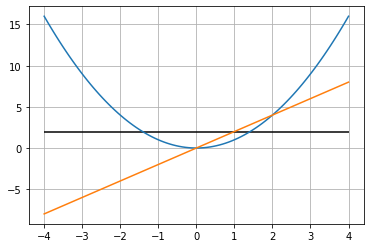

In [46]:
x=np.linspace(-4,4,100)
y=np.power(x,2)
dydx=2*x
dydx2=2
plt.plot(x,y)
plt.plot(x,dydx)
plt.hlines(2,xmin=-4,xmax=4)
plt.grid()

Sin embargo hay casos especiales en los cuales los criterias de la primera y segunda derivada no funcionan. Uno de estos casos son **los puntos de inflexión**:

<img src="https://raw.githubusercontent.com/mrivas/ModelamientoDeProcesosBiotecnologicos/master/clase11_fig3.png" width="400">

En este caso la segunda derivada es igual a cero, y el punto en donde ocurre el punto inflexión no es ni un mínimo ni un máximo. Esto ocurre, por ejemplo, en $x=0$ en la función $f(x)=x^3$.

Otro caso en donde el criterio de las derivadas no funciona es cuando la **función es discontinua** en el punto máximo/mínimo. En esto caso el máximo/mínimo existe, pero dado que no podemos derivar la función, no podemos ocupar el criterío de las derivadas. Éste es el caso de $x=0$ en la función $f(x)=|x|$

<img src="https://raw.githubusercontent.com/mrivas/ModelamientoDeProcesosBiotecnologicos/master/clase11_fig4.png" width="400">

Finalmente, un máximo o mínimo puede ocurrir aún cuando la derivada la función sea distinta de cero. Tal es el caso de los **máximos y mínimos ubicados en el punto extremo del dominio de una función**. 

<img src="https://raw.githubusercontent.com/mrivas/ModelamientoDeProcesosBiotecnologicos/master/clase11_fig5.png" width="400">

Ejemplo: El problema del salvavidas
---------

Un salvavidas ubicado en el punto $A$ ve a un bañista con problemas en el punto $B$. El salvavidas save su desplasamiento es mucho más rápido en la arena que en el agua. Por lo tanto, para llegar lo más rapido posible al bañista es mejor no viajar en linea recta hacia el bañista sino que de manera indirecta para pasa alargar su trayecto por la arena. ¿Qué ruta debería seguir el salvavidas para demorarse lo menos posible en llegar al bañista? 

<img src="https://raw.githubusercontent.com/mrivas/ModelamientoDeProcesosBiotecnologicos/master/clase11_fig6.png" width="600">

Llamemos a la velocidad del salvavidas en la arena y agua como $v_s$ y $v_w$, respectivamente. También, que la distancia entre el salvavidas y el agua es $a$, que la distancia entre el bañista y la orilla es $b$, y que la distancia horizontal entre el salvavidas y el bañista es $c$. Llamaremos $x$ a la distancia horizontal en la cual el salvavidas entra al agua. Por otra parte, las distancias recorridas por el bañista en la arena y agua serán $d_s$ y $d_w$, respectivamente. 

Queremos el valor de $x$ que minimiza el tiempo total, $t$, el cual corresponde a:

$t=\frac{d_s}{v_s}+\frac{d_w}{v_s}$

Ejercicio
---------

1. Determina la ecuación $t$ en términos de $a,b,c,v_s,v_w$ y $x$. Pista, usa el teorema de Pitagoras para reemplazar $d_s$ y $d_w$ por expresiones que involucren los términos antes mencionados.
2. Considerando $a = 20$ m, $b = 50$ m, $c = 100$ m, $v_s = 6$ m/sec, y $v_w = 3$ m/sec, gráfica $t$ como función de $x$ en el dominio $x \in [0,100]$.
3. Gráfica la derivada de la función anterior. Consejo, puedes usar la librería ```symp``` para econtrar la derivada de una función. Abajo un ejemplo de como usar tal librería. 

In [64]:
import sympy as sp
import numpy as np
x = sp.Symbol('x')
y = x**2 + 1
yprime = y.diff(x)
yprime


2*x